In [53]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

LOAD DATASET

In [54]:
df=pd.read_csv('/content/Iris.csv')

In [55]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df=df.drop(columns=['Id'])


In [57]:
#To basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
#To dispaly no of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

PREPROCESSING THE DATASETS

In [59]:
#Check for Null Values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

EXPLORATORY DATA ANALYSIS

<Axes: >

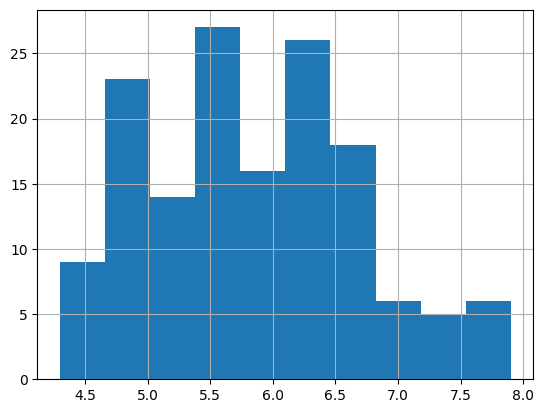

In [60]:
#Histogram
df['SepalLengthCm'].hist()

<Axes: >

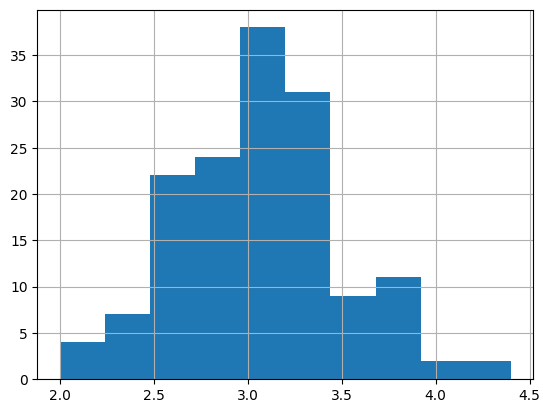

In [61]:
df['SepalWidthCm'].hist()

<Axes: >

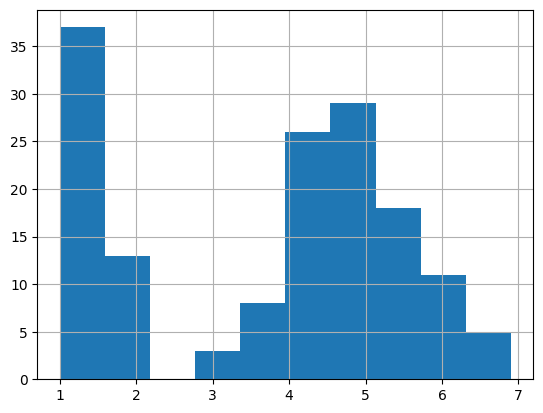

In [62]:
df['PetalLengthCm'].hist()

<Axes: >

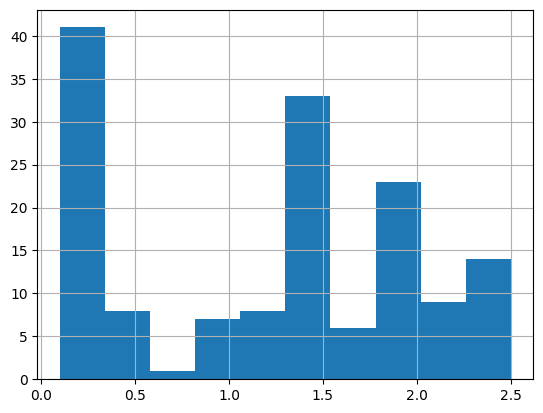

In [63]:
df['PetalWidthCm'].hist()

In [64]:
#ScatterPlot
colors=['red','orange','blue']
Species=['Iris-virginica','Iris-versicolor','Iris-setosa']

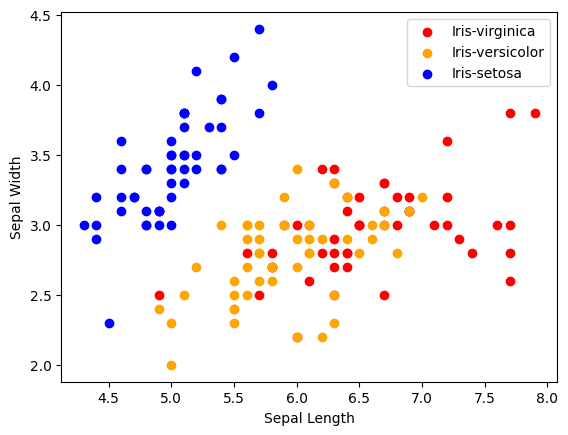

In [65]:
for i in range(3):
  x=df[df['Species']==Species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=Species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  plt.legend()

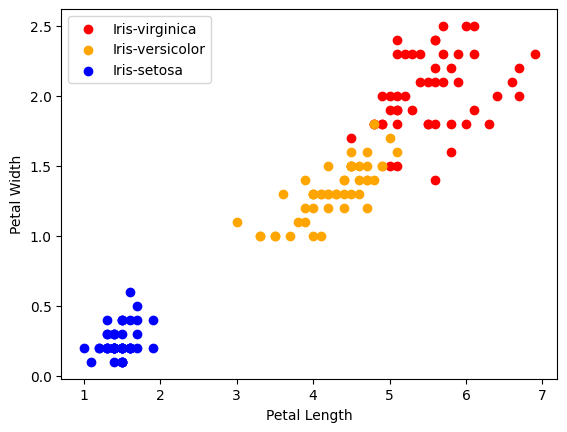

In [66]:
for i in range(3):
  x=df[df['Species']==Species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=Species[i])
  plt.xlabel("Petal Length")
  plt.ylabel("Petal Width")
  plt.legend()

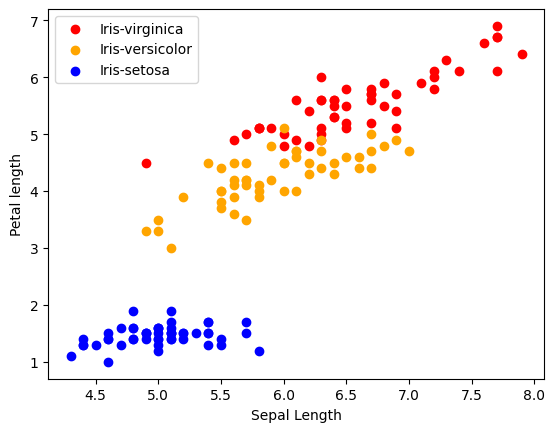

In [67]:
for i in range(3):
  x=df[df['Species']==Species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=Species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Petal length")
  plt.legend()

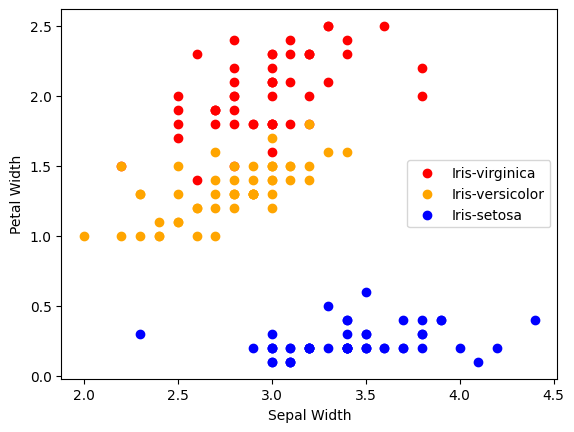

In [68]:
for i in range(3):
  x=df[df['Species']==Species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=Species[i])
  plt.xlabel("Sepal Width")
  plt.ylabel("Petal Width")
  plt.legend()

CORRELATION MATRIX

In [69]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

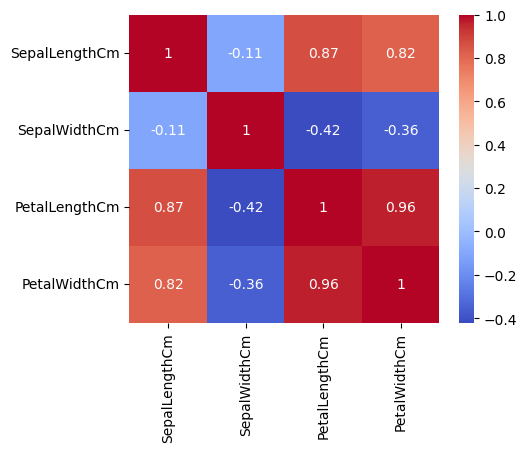

In [70]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

LABEL ENCODER

In [71]:
#from sklearn.preprocessing import LabelEncoder
#le  = LabelEncoder()

In [72]:
#df['Species'] = le.fit_transform(df['Species'])
#df.head()

MODEL TRAINING


In [73]:
from sklearn.model_selection import train_test_split
# train - 70
# test  - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test  = train_test_split(X,Y, test_size=0.30)

In [74]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [75]:
#model traing
model.fit(x_train, y_train)

LogisticRegression()

In [76]:
print('Accuracy :', model.score(x_test, y_test)*100)

Accuracy : 97.77777777777777


In [77]:
#knn - K nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [78]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [79]:
print('Accuracy :', model.score(x_test, y_test)*100)

Accuracy : 97.77777777777777


In [80]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [81]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [82]:
print('Accuracy :', model.score(x_test, y_test)*100)

Accuracy : 97.77777777777777


In [83]:
#Save The Model
import joblib
filename='savemodel.joblib'
pickle.dump(model,open(filename,'wb'))


In [84]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
116,6.5,3.0,5.5,1.8
125,7.2,3.2,6.0,1.8
59,5.2,2.7,3.9,1.4
8,4.4,2.9,1.4,0.2
61,5.9,3.0,4.2,1.5


In [85]:
load_model=joblib.load(open(filename,'rb'))

In [86]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)